Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)


chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import _pickle 


In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.caa.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [59]:
df.head(10).style.background_gradient(cmap = 'copper')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.400000,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.300000,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000000,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.600000,2,0,2,1


In [60]:
df.shape

(303, 14)

In [61]:
df.describe().style.background_gradient(cmap = 'copper')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [62]:
df.isna().count()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

In [63]:
# Removing duplicate rows

print('Duplicate Rows Count : ', df.duplicated().sum())

df=df.drop_duplicates(keep="first")

Duplicate Rows Count :  1


In [64]:
df.select_dtypes('number').apply(pd.Series.nunique, axis = 0)

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

There's no missing value on the data set, which is great.

Based on the number of unique values for each column,


I'll assume that the categorial variables are the ones with few unique values and the continuous are with a lot of values.

In [65]:
cat_list = ['sex','exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
con_list = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

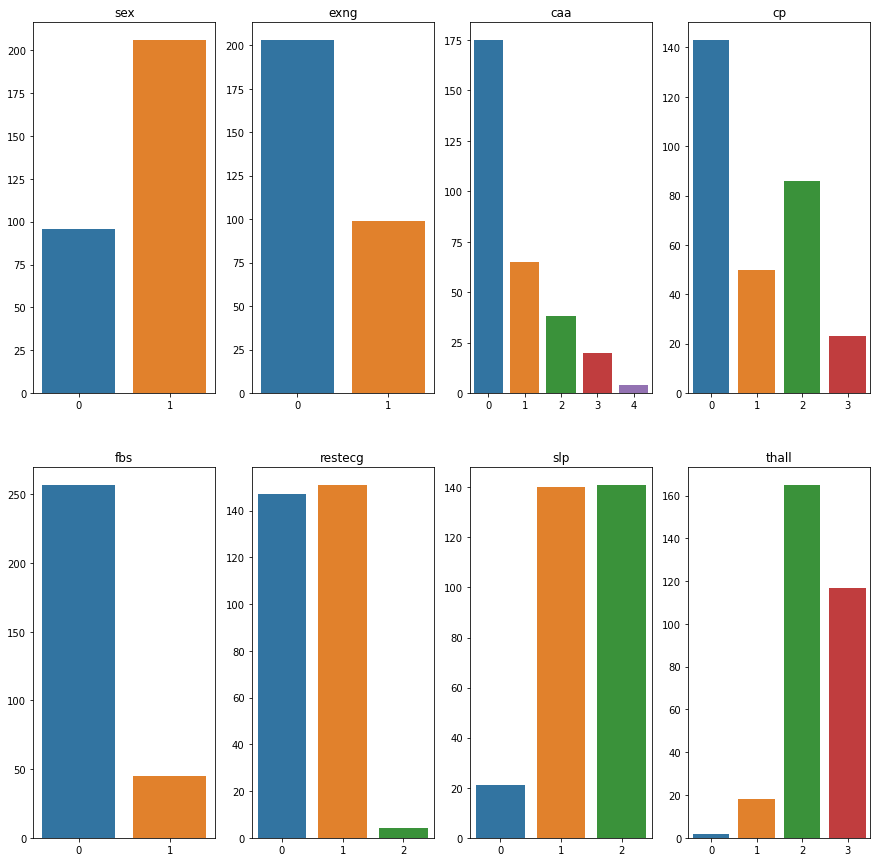

In [66]:
# Countplot of categorial variables
fig = plt.figure(figsize=(15,15))
for i, col in enumerate(cat_list):
    axi = plt.subplot(2, 4, i+1)
    sns.countplot(ax=axi, data=df, x=col).set_title(col)
    axi.set_xlabel('')
    axi.set_ylabel('')

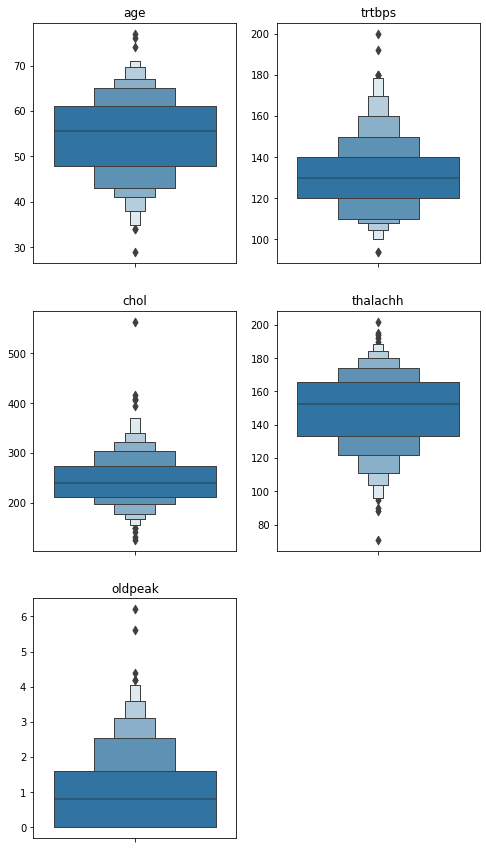

In [67]:
# Boxplot of continuos variable
fig = plt.figure(figsize=(8,15))
for i, col in enumerate(con_list):
    axi = plt.subplot(3, 2, i+1)
    sns.boxenplot(ax=axi, y=df[col]).set_title(col)
    axi.set_ylabel('')

[Text(0, 0, 'low proness'), Text(1, 0, 'high proness')]

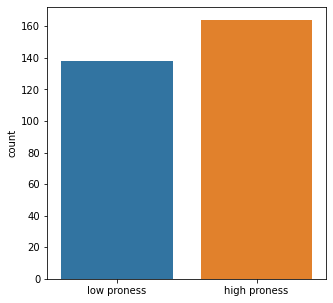

In [68]:
# Plot total 
fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data=df, x='output')
ax.set_xlabel('')
ax.set_xticklabels(['low proness', 'high proness'])

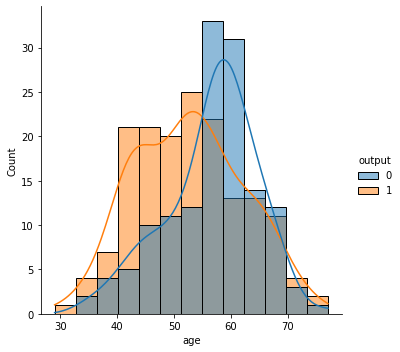

In [69]:
# Plot the histogram based on age and output value
ax=sns.displot(data=df, x='age', hue='output', kde=True)

[Text(0, 0, 'sex 0'), Text(1, 0, 'sex 1')]

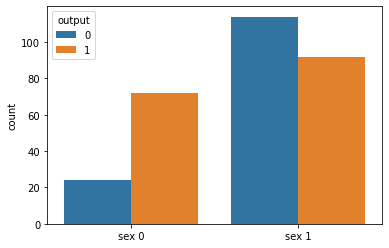

In [70]:
ax=sns.countplot(data=df, x='sex', hue='output')
ax.set_xlabel('')
ax.set_xticklabels(['sex 0', 'sex 1'])

There are more people prone to heart attack.

It's seems like people below the age around 55 are more prone to a heart attack compared to people above 55.

The heart attack proness peak is around the age of 45.

People of sex 0 are 4 times, approximately, more prone to a heart attack.

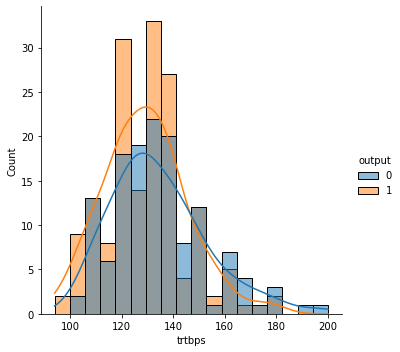

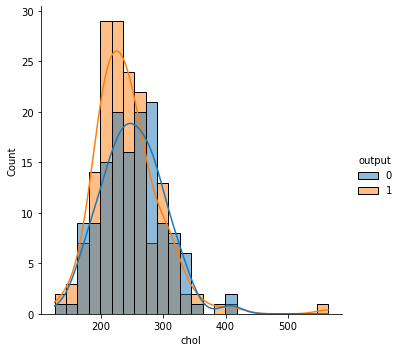

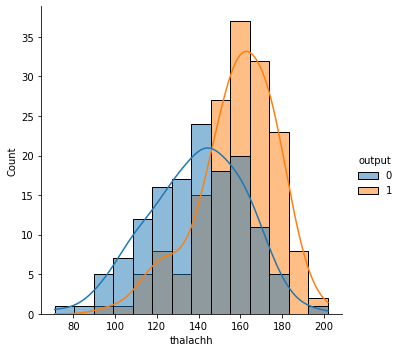

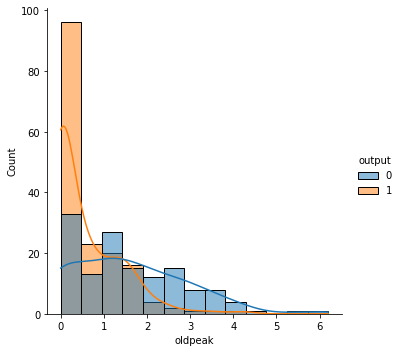

In [71]:
# More distribuitions
for i, col in enumerate(con_list[1::]):
    axi = sns.displot(data=df, x=col, hue='output', kde=True)

People with higher thalachh are more prone to a heart attack.

People with lower oldpeak are more prone to a heart attack.

Now, let's look at the correlation between variables and plot the heatmap.

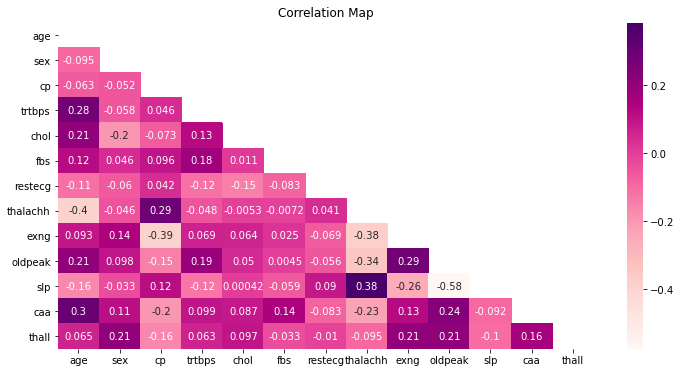

In [72]:
# Checking for multicolinearity 
plt.figure(figsize=(12,6))
df2 = df.drop('output',axis=1)
corr = df2.corr()
matrix =  np.triu(np.ones_like(corr))

sns.heatmap(corr,annot=True,mask=matrix,cmap='RdPu')
plt.title('Correlation Map')
plt.show()

In [73]:
#Highly correlated features:
cols = ['slp','thalachh','oldpeak']

In [74]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [75]:
X = df.drop('output', axis=1)
Y = df['output']

In [76]:
print("Shape of X",X.shape)
print("Shape of y",Y.shape)

Shape of X (302, 13)
Shape of y (302,)


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
# Split the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [79]:
print("Shape of the data after making split:",X_train.shape)
print("Shape of the data after making split:",X_test.shape)

Shape of the data after making split: (271, 13)
Shape of the data after making split: (31, 13)


# Using logistic regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [81]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
# Saving model to disk
_pickle.dump(logreg, open('model.pkl','wb'))

In [85]:
y_pred = logreg.predict(X_test)

In [86]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [87]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)

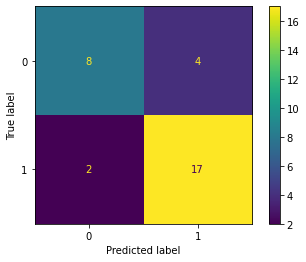

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=logreg.classes_)
disp.plot()
plt.show()

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.81      0.89      0.85        19

    accuracy                           0.81        31
   macro avg       0.80      0.78      0.79        31
weighted avg       0.81      0.81      0.80        31



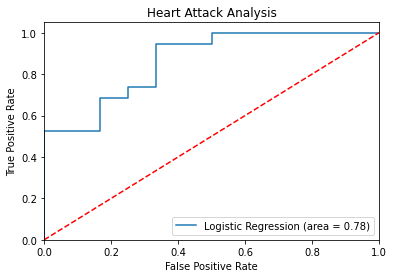

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart Attack Analysis')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Using DecisionTreeClassifier

In [91]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [92]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [93]:
print('model_DT Train Score is : ' , classifier.score(X_train, y_train))
print('model_DT Test Score is : ' , classifier.score(X_test, y_test))

model_DT Train Score is :  1.0
model_DT Test Score is :  0.7741935483870968


In [94]:
from sklearn.metrics import accuracy_score
print("The Score is: ",accuracy_score(y_test , y_pred)*100)

The Score is:  77.41935483870968


In [95]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)

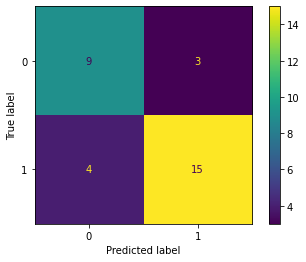

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.83      0.79      0.81        19

    accuracy                           0.77        31
   macro avg       0.76      0.77      0.77        31
weighted avg       0.78      0.77      0.78        31



In [98]:
#probability of all values
pr = classifier.predict_proba(X_test)[0:10,:]
pr

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [99]:
#probability of zeros
pr = classifier.predict_proba(X_test)[0:10,0]
pr

array([1., 0., 0., 1., 1., 0., 1., 0., 0., 0.])

In [44]:
#probability of ones
pr = classifier.predict_proba(X_test)[0:10,1]
pr

array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.])

# Using RandomForestClassifier

In [45]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
rf_grid = [{'n_estimators' : [100, 150, 175, 200],
            'max_depth' : [5, 6, 7, 8, 9, 10], 
            'max_features' : [3, 4, 5],
           'min_samples_split':[2,3,4],
           'min_samples_leaf':[1,2]}]

folds = StratifiedKFold(n_splits = 3)

gscv = GridSearchCV(estimator = model, param_grid = rf_grid, cv = folds, scoring = 'roc_auc', return_train_score = True, verbose = 1, n_jobs = -1)

rf_fit = gscv.fit(X, Y)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  2.6min finished


In [46]:
print("score : {}".format(rf_fit.best_score_))
rf_fit.best_params_

score : 0.9104035524325379


{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [47]:
rf_opt = rf_fit.best_estimator_

<AxesSubplot:xlabel='importance', ylabel='feature'>

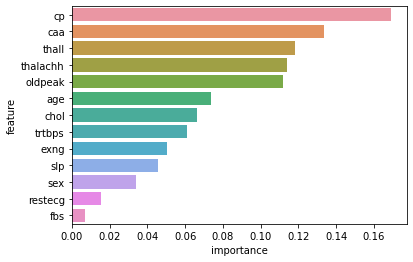

In [48]:
rf_df = pd.DataFrame({'feature' : X.columns, 'importance' : rf_opt.feature_importances_})
rf_df = rf_df.sort_values(by = 'importance', ascending = False)
sns.barplot(data = rf_df, y = 'feature', x = 'importance')

In [50]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 42)
xgb_grid = [{'n_estimators' : [500, 550],
            'max_depth' :[3,5],
            'learning_rate' : [0.01, 0.025]}]

folds = StratifiedKFold(n_splits = 3)

gscv = GridSearchCV(estimator = model, param_grid = xgb_grid, cv = folds, scoring = 'roc_auc', return_train_score = True, verbose = 1, n_jobs = -1)

xgb_fit = gscv.fit(X, Y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    6.1s finished
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:03:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [51]:
print("score : {}".format(xgb_fit.best_score_))
xgb_fit.best_params_


score : 0.8984384911921143


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 550}

In [52]:
xgb_opt = xgb_fit.best_estimator_

<AxesSubplot:xlabel='importance', ylabel='feature'>

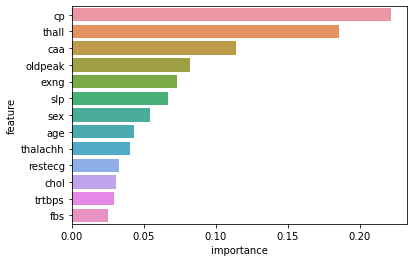

In [53]:
xgb_df = pd.DataFrame({'feature' : X.columns, 'importance' : xgb_opt.feature_importances_})
xgb_df = xgb_df.sort_values(by = 'importance', ascending = False)
sns.barplot(data = xgb_df, y = 'feature', x = 'importance')